In [10]:
from google.colab import drive
drive.mount('/content/drive')
dir_path = '/content/drive/My Drive/Colab Notebooks/ch04/'
import os
os.chdir(dir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


| epoch 1 |  iter 1 / 9295 | time 0[s] | loss 4.16
| epoch 1 |  iter 21 / 9295 | time 0[s] | loss 4.16
| epoch 1 |  iter 41 / 9295 | time 0[s] | loss 4.15
| epoch 1 |  iter 61 / 9295 | time 0[s] | loss 4.12
| epoch 1 |  iter 81 / 9295 | time 0[s] | loss 4.04
| epoch 1 |  iter 101 / 9295 | time 1[s] | loss 3.92
| epoch 1 |  iter 121 / 9295 | time 1[s] | loss 3.77
| epoch 1 |  iter 141 / 9295 | time 1[s] | loss 3.63
| epoch 1 |  iter 161 / 9295 | time 1[s] | loss 3.49
| epoch 1 |  iter 181 / 9295 | time 2[s] | loss 3.37
| epoch 1 |  iter 201 / 9295 | time 2[s] | loss 3.25
| epoch 1 |  iter 221 / 9295 | time 2[s] | loss 3.16
| epoch 1 |  iter 241 / 9295 | time 2[s] | loss 3.11
| epoch 1 |  iter 261 / 9295 | time 2[s] | loss 3.02
| epoch 1 |  iter 281 / 9295 | time 3[s] | loss 2.97
| epoch 1 |  iter 301 / 9295 | time 3[s] | loss 2.91
| epoch 1 |  iter 321 / 9295 | time 3[s] | loss 2.88
| epoch 1 |  iter 341 / 9295 | time 3[s] | loss 2.85
| epoch 1 |  iter 361 / 9295 | time 4[s] | loss 2.83

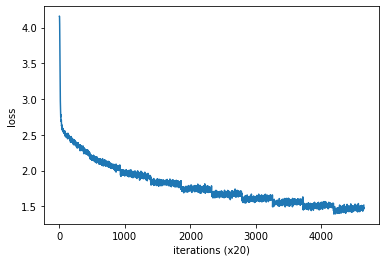

In [6]:
import sys
sys.path.append('..')
from common import config
config.GPU = True
from common.np import *
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from cbow import CBOW
from skip_gram import SkipGram
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb
# ハイパーパラメータの設定
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10
# データの読み込み
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)

# モデル生成
model = CBOW(vocab_size, hidden_size, window_size, corpus)
# model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 学習開始
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

# データを保存
word_vecs = model.word_vecs
if config.GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'  # or 'skipgram_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)




```
object __array__ method not producing an array  
```
というエラーが出てきてずっと躓いていた。サンプルコードでは実行できたので、後日原因を調べたい。学習自体はうまくできている。

ゼロから始めるDeepLearning２　「改良版word2vecの学習」